In [4]:
import numpy as np
import matplotlib.pyplot as plt

import F16model.utils.control_metrics as utils_metrics
from ppo_control import run_sim

In [5]:
def get_nmae(env_config, model_name):
    states, _, ref_signal, _, _ = run_sim(env_config, model_name)
    nmae_value = utils_metrics.nMAE(ref_signal, [i[1] for i in states])
    return nmae_value


def plot_stat(H_values, V_values, Z_values):
    fig, ax = plt.subplots()
    CS = ax.contour(H_values, V_values, Z_values)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title("Simplest default with labels")
    plt.show()

In [89]:
model_name = r"D:\Documents\Шарага\diser\model\F16-model-python\runs\optuna_omega_z_control\F16__1__1710300960__cd61"
H_array = np.arange(2000, 10000 , 500)
V_array = np.arange(100, 300, 20)
init_control = np.array([0, 0])
nmae_H = []
for H in H_array:
    nmae_V = []
    for V in V_array:
        init_state = np.array([0, H, 0, 0, V, 0])
        ENV_CONFIG = {
            "dt": 0.01,
            "tn": 10,
            "debug_state": False,
            "determenistic_ref": True,
            "scenario": "cos",
        }
        ENV_CONFIG["init_state"] = init_state
        ENV_CONFIG["init_control"] = init_control
        nmae_V.append(get_nmae(ENV_CONFIG, model_name))
        print(nmae_V)
    nmae_H.append(nmae_V)
nmae_H = np.array(nmae_H)

Run with seed = 194
Start state: Ox = 0 m; Oy = 2000 m; wz = 0.0 deg/s; V = 100; theta = 0.0; stab_pos = 0.0 deg; dstab = 0.0 deg/s; thrust = 0.0 H %
[0.15598644962972472]
Run with seed = 835
Start state: Ox = 0 m; Oy = 2000 m; wz = 0.0 deg/s; V = 120; theta = 0.0; stab_pos = 0.0 deg; dstab = 0.0 deg/s; thrust = 0.0 H %
[0.15598644962972472, 0.09328406629966954]
Run with seed = 632
Start state: Ox = 0 m; Oy = 2000 m; wz = 0.0 deg/s; V = 140; theta = 0.0; stab_pos = 0.0 deg; dstab = 0.0 deg/s; thrust = 0.0 H %
[0.15598644962972472, 0.09328406629966954, 0.0809290150358213]
Run with seed = 376
Start state: Ox = 0 m; Oy = 2000 m; wz = 0.0 deg/s; V = 160; theta = 0.0; stab_pos = 0.0 deg; dstab = 0.0 deg/s; thrust = 0.0 H %
[0.15598644962972472, 0.09328406629966954, 0.0809290150358213, 0.059584351547991445]
Run with seed = 689
Start state: Ox = 0 m; Oy = 2000 m; wz = 0.0 deg/s; V = 180; theta = 0.0; stab_pos = 0.0 deg; dstab = 0.0 deg/s; thrust = 0.0 H %
[0.15598644962972472, 0.0932840662996

In [90]:
H, V = np.meshgrid(H_array, V_array, indexing="ij")
print(np.shape(H), np.shape(V), np.shape(nmae_H))
print((H), (V), (nmae_H))

(16, 10) (16, 10) (16, 10)
[[2000 2000 2000 2000 2000 2000 2000 2000 2000 2000]
 [2500 2500 2500 2500 2500 2500 2500 2500 2500 2500]
 [3000 3000 3000 3000 3000 3000 3000 3000 3000 3000]
 [3500 3500 3500 3500 3500 3500 3500 3500 3500 3500]
 [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000]
 [4500 4500 4500 4500 4500 4500 4500 4500 4500 4500]
 [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
 [5500 5500 5500 5500 5500 5500 5500 5500 5500 5500]
 [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
 [6500 6500 6500 6500 6500 6500 6500 6500 6500 6500]
 [7000 7000 7000 7000 7000 7000 7000 7000 7000 7000]
 [7500 7500 7500 7500 7500 7500 7500 7500 7500 7500]
 [8000 8000 8000 8000 8000 8000 8000 8000 8000 8000]
 [8500 8500 8500 8500 8500 8500 8500 8500 8500 8500]
 [9000 9000 9000 9000 9000 9000 9000 9000 9000 9000]
 [9500 9500 9500 9500 9500 9500 9500 9500 9500 9500]] [[100 120 140 160 180 200 220 240 260 280]
 [100 120 140 160 180 200 220 240 260 280]
 [100 120 140 160 180 200 220 240 260 

Text(0.5, 0.5, 'V, м/с')

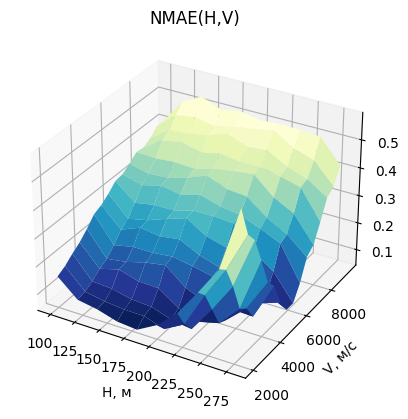

In [93]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(V, H, nmae_H, cmap=plt.cm.YlGnBu_r)
ax.set_title("NMAE(H,V)")
ax.set_xlabel("H, м")
ax.set_ylabel("V, м/с")